[ 3.07742381e+15  1.33313971e+02  6.81808541e+01  4.72685489e+01
  3.75737277e+01  3.26003863e+01  3.03470185e+01  3.02572039e+01
  3.27199881e+01  3.98667234e+01  6.16589764e+01  2.78196094e+02
 -7.62336205e+01 -2.92568474e+01 -1.67384408e+01 -1.11393142e+01
 -8.06852782e+00 -6.19380404e+00 -4.97862784e+00 -4.16929732e+00
 -3.63384573e+00 -3.30058795e+00 -3.13163381e+00 -3.11074516e+00
 -3.23787238e+00 -3.52716870e+00 -4.00701257e+00 -4.72131964e+00
 -5.73179385e+00 -7.12096897e+00 -8.99600601e+00 -1.14932740e+01
 -1.47837723e+01 -1.90794686e+01 -2.46406346e+01 -3.17842696e+01
 -4.08937100e+01 -5.24295296e+01 -6.69418450e+01 -8.50841470e+01
 -1.07628790e+02 -1.35484278e+02 -1.69714487e+02 -2.11559997e+02
 -2.62461671e+02 -3.24086684e+02 -3.98357149e+02 -4.87481563e+02
 -5.93989251e+02 -7.20768017e+02]


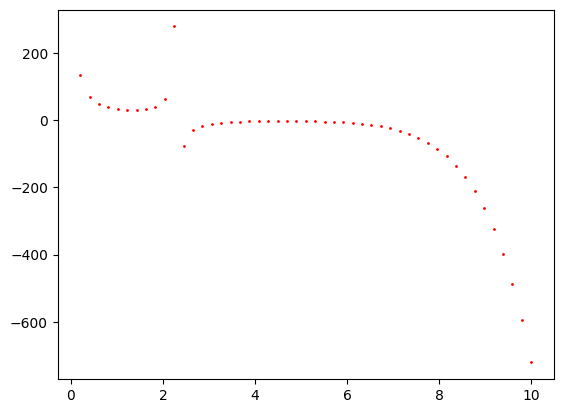

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
#生成数据
x = np.linspace(0, np.pi, 10)
y = 5.0*np.cos(x)
 
#拟合曲线
fx = np.poly1d(np.polyfit(y,x,5))
dfx = fx.deriv()  # deriv()方法可得该格式函数的导函数
ddfx = dfx.deriv()
 
#求曲率半径
def calc_kappa(s):
    dx = dfx(s)
    ddx = ddfx(s)
    r = ((1 + (dx ** 2)) ** (3 / 2)) / ddx
    return r
 
snew = np.linspace(0, 10, 50)
k_buf = []
for i in snew:
    k = calc_kappa(i)
    k_buf.append(k)
k_buf = np.array(k_buf)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(snew[1:], k_buf[1:], s=1.0, color='red')
print(k_buf)
plt.show()

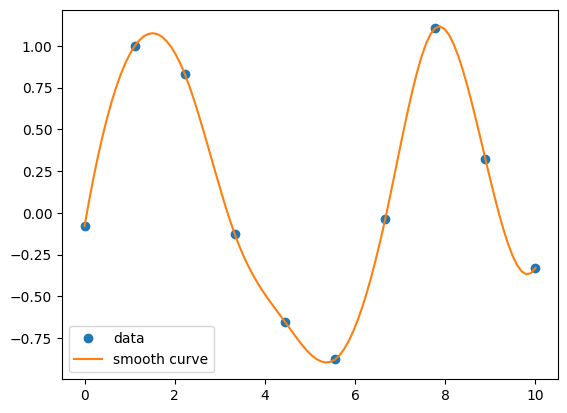

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# 生成一些随机数据点
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(0, 0.2, 10)

# 使用 scipy.interpolate.splrep() 函数对数据点进行三次样条插值
tck = interpolate.splrep(x, y)

# 使用 scipy.interpolate.splev() 函数计算插值后的曲线上的新点
xnew = np.linspace(0, 10, 100)
ynew = interpolate.splev(xnew, tck)

# 使用 matplotlib.pyplot.plot() 函数绘制原始数据点和插值后的曲线
plt.plot(x, y, 'o', label='data')
plt.plot(xnew, ynew, '-', label='smooth curve')
plt.legend()
plt.show()

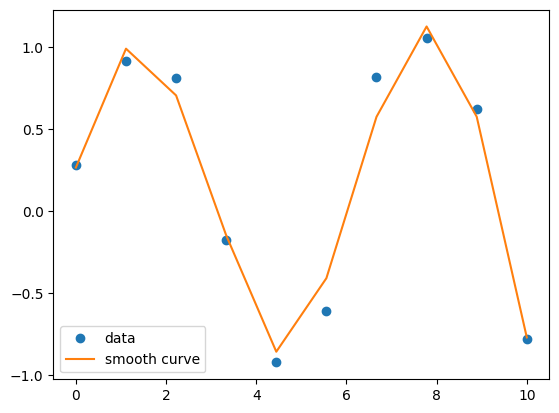

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 生成一些随机数据点
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(0, 0.2, 10)

# 使用 scipy.signal.savgol_filter() 函数对数据进行 Savitzky-Golay 滤波
y_smooth = savgol_filter(y, 5, 3) # window_length=5, polyorder=3

# 使用 matplotlib.pyplot.plot() 函数绘制原始数据点和平滑后的曲线
plt.plot(x, y, 'o', label='data')
plt.plot(x, y_smooth, '-', label='smooth curve')
plt.legend()
plt.show()

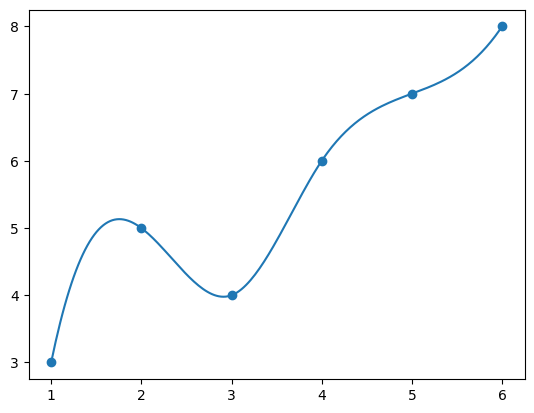

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

# 生成数据点
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([3, 5, 4, 6, 7, 8])

# 使用样条插值生成光滑的曲线
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = make_interp_spline(x, y, k=3)  # 三次样条插值
y_smooth = spl(x_smooth)

# 绘制图形
plt.plot(x_smooth, y_smooth)
plt.scatter(x, y)
plt.show()

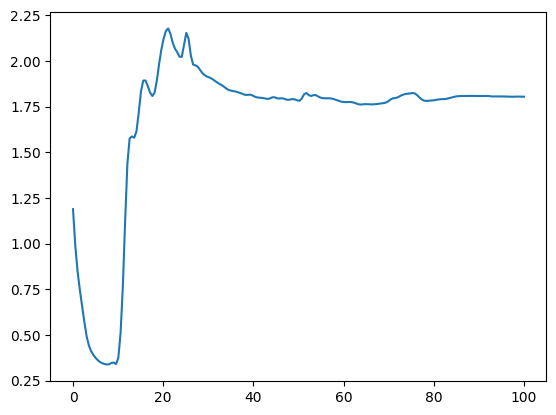

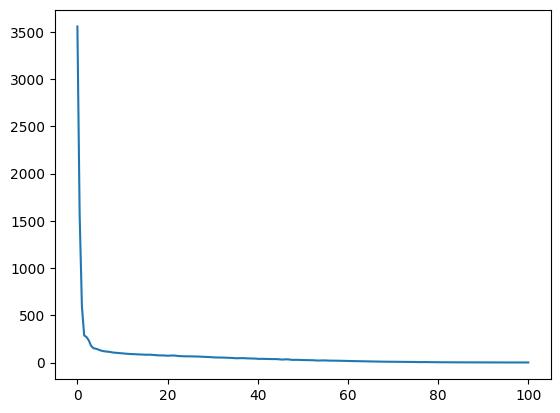

In [27]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("loss.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
# 使用样条插值生成光滑的曲线
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = make_interp_spline(x, train_loss, k=3)  # 三次样条插值
y_smooth = spl(x_smooth)

spl = make_interp_spline(x, type_loss, k=3)  # 三次样条插值
y_smooth_type = spl(x_smooth)


# 绘制图形
plt.plot(x_smooth, y_smooth)

plt.show()

plt.plot(x_smooth, y_smooth_type)
plt.show()

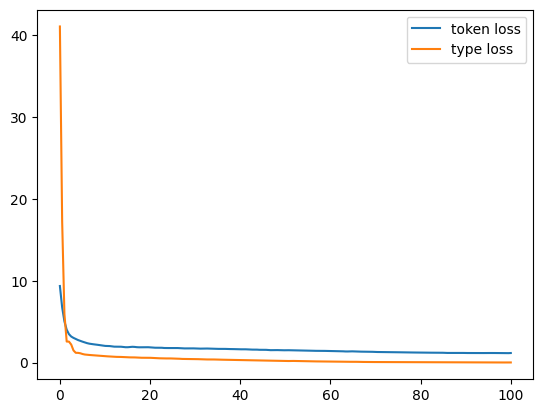

In [31]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("noavg_type_loss_weight_0.1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss) * 10
type_loss = np.array(type_loss)
# 使用样条插值生成光滑的曲线
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = make_interp_spline(x, train_loss, k=3)  # 三次样条插值
y_smooth = spl(x_smooth)

spl = make_interp_spline(x, type_loss, k=3)  # 三次样条插值
y_smooth_type = spl(x_smooth)


# 绘制图形
plt.plot(x_smooth, y_smooth, label="token loss")
plt.plot(x_smooth, y_smooth_type, label="type loss")
plt.legend()
# plt.scatter(x, train_loss, s=0.5)
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

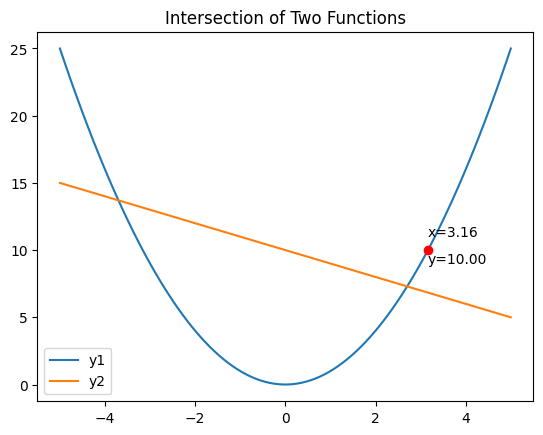

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 创建数据
x = np.linspace(-5, 5, 100)
y1 = x ** 2
y2 = 10 - x

# 绘制函数曲线
plt.plot(x, y1, label='y1')
plt.plot(x, y2, label='y2')

# 计算相交点
root = np.roots([1, 0, -10])[0]
intersection = (root, root ** 2)

# 绘制相交点
plt.plot(*intersection, 'ro')

# 显示相交点的横纵坐标
plt.text(intersection[0], intersection[1] + 1, f"x={intersection[0]:.2f}")
plt.text(intersection[0], intersection[1] - 1, f"y={intersection[1]:.2f}")

# 显示图例和标题
plt.legend()
plt.title('Intersection of Two Functions')

# 显示图形
plt.show()

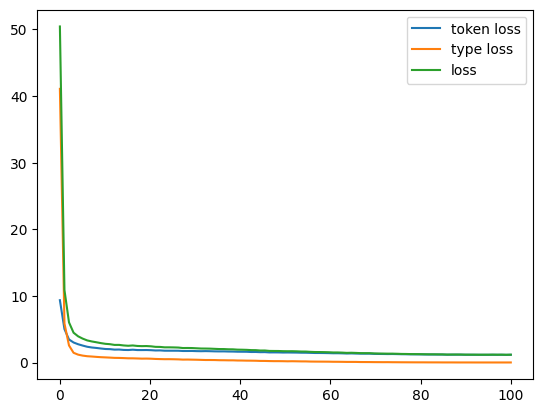

In [101]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss) * 10
type_loss = np.array(type_loss)
loss = train_loss + type_loss
# # 使用样条插值生成光滑的曲线
# x_smooth = np.linspace(x.min(), x.max(), 200)
# spl = make_interp_spline(x, train_loss, k=3)  # 三次样条插值
# y_smooth = spl(x_smooth)

# spl = make_interp_spline(x, type_loss, k=3)  # 三次样条插值
# y_smooth_type = spl(x_smooth)


# 绘制图形
# plt.plot(x_smooth, y_smooth, label="token loss")
# plt.plot(x_smooth, y_smooth_type, label="type loss")
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
plt.legend()
# plt.scatter(x, train_loss, s=0.5)
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

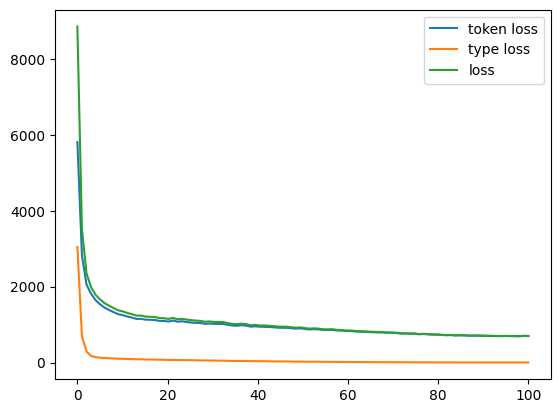

In [66]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("noavg_type_loss_weight_0.1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss) * 10
type_loss = np.array(type_loss)
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
plt.legend()
# plt.scatter(x, train_loss, s=0.5)
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

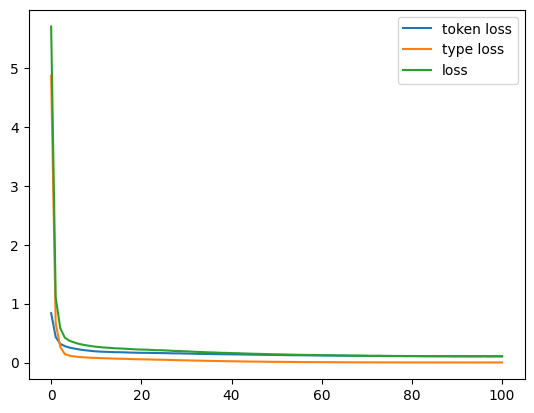

In [75]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_0.1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

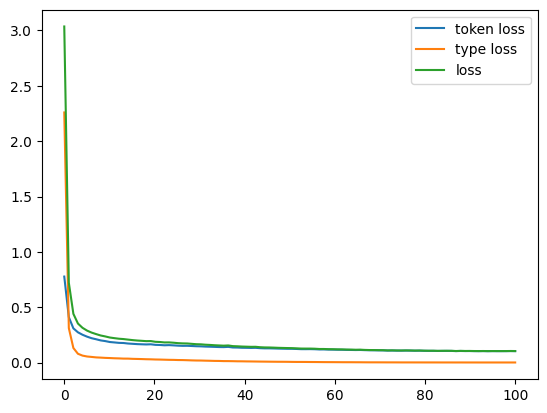

In [100]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_0.05.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
loss = train_loss + type_loss

# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

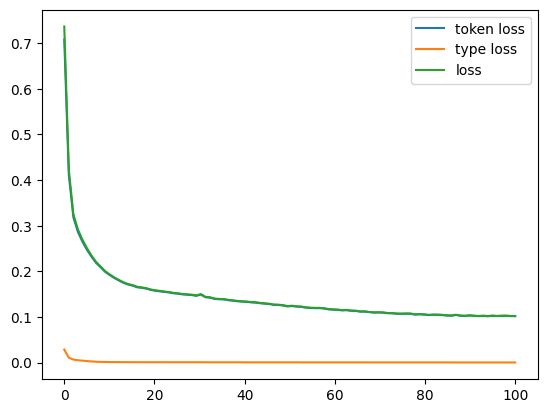

In [77]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_0.001.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()


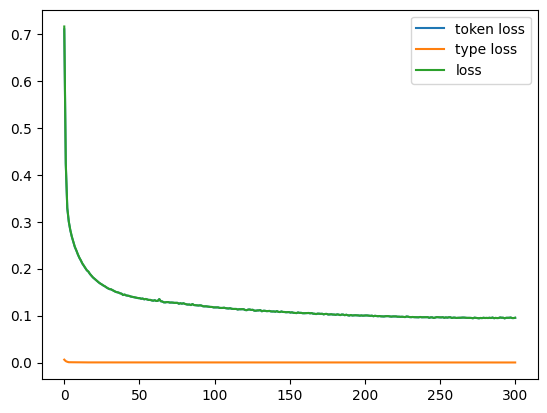

In [89]:
import numpy as np
x = np.linspace(0, 300, 300)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_0.0001.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

500


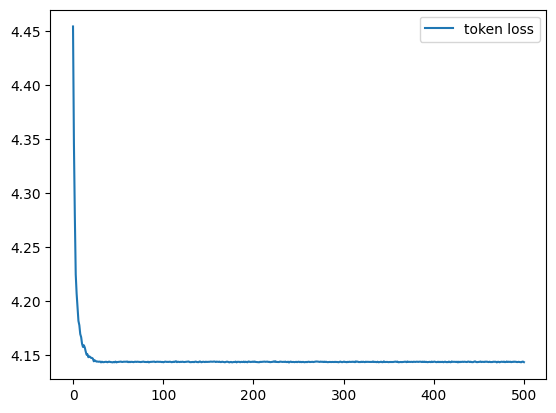

In [120]:
import numpy as np
x = np.linspace(0, 500, 500)
train_loss = []
type_loss = []
with open("cons_loss_weight_1_bz_32.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 4 == 2:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 4 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
print(len(type_loss))
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
# plt.plot(x, type_loss, label="type loss")
# plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

nan


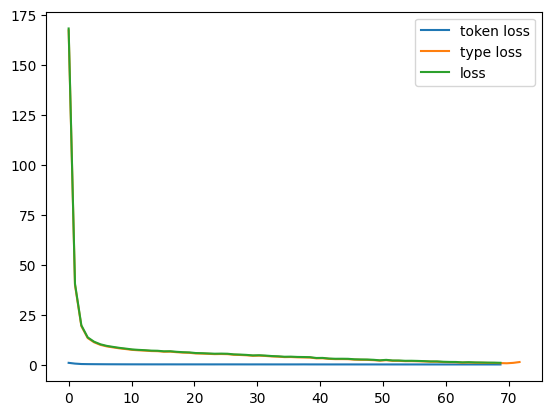

In [117]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_10.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print(train_loss[-1])
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

0.1052
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


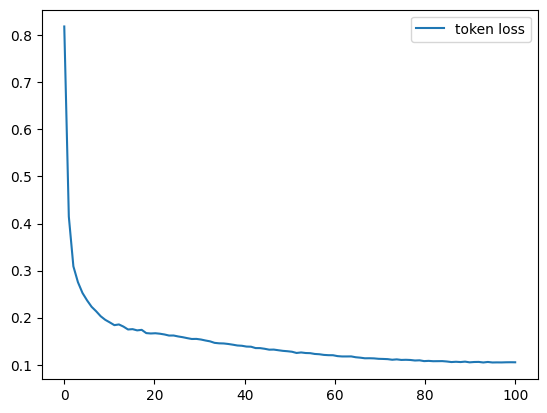

In [115]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("weight_0.1_val/avg_type_loss_weight_0.1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print(train_loss[-1])
loss = train_loss + type_loss


v_x = np.linspace(0, 100, 11)
print(v_x)
val_loss = []
val_type_loss = []
with open("weight_0.1_val/val_avg_type_loss_weight_0.1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 4 == 2:
            train_loss_line = line.split("(")[1].split(",")[0]
            val_loss.append(float(train_loss_line))
        elif i % 4 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_type_loss.append(float(type_loss_line))


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")
# plt.plot(v_x, val_loss, label="val token loss")
# plt.plot(v_x, val_type_loss, label="val type loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

0.1012


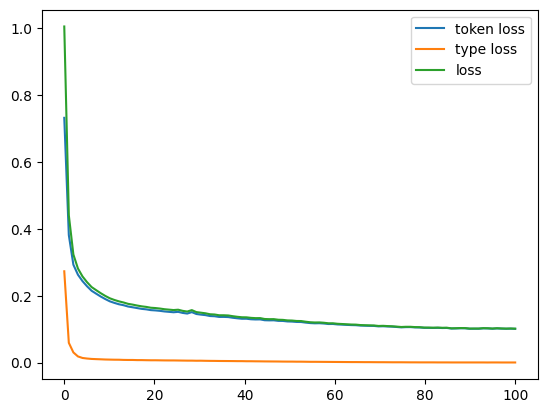

In [121]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("avg_type_loss_weight_0.01.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print(train_loss[-1])
loss = train_loss + type_loss


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")


# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

### predict reation type on decoder layer

0.1276


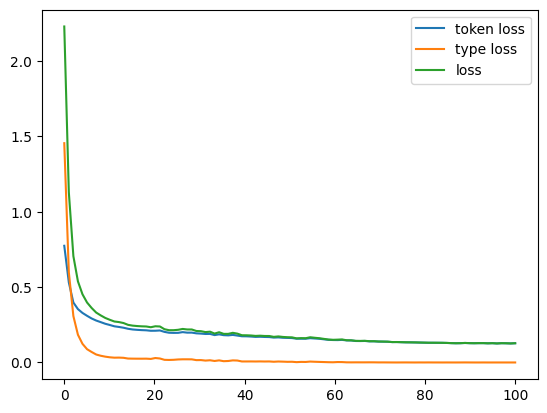

In [133]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("decoder_loss_logs/avg_decoder_type_loss_weight_1.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 3 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 3 == 2:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print(train_loss[-1])
loss = train_loss + type_loss


# v_x = np.linspace(0, 300, 31)
# print(v_x)
# val_loss = []
# val_type_loss = []
# with open("decoder_loss_logs/val_avg_decoder_type_loss_weight_0.1.txt", "r") as f:
#     lines = f.readlines()
#     for i, line in enumerate(lines):
#         if i % 4 == 2:
#             train_loss_line = line.split("(")[1].split(",")[0]
#             val_loss.append(float(train_loss_line))
#         elif i % 4 == 3:
#             type_loss_line = line.split("(")[1].split(",")[0]
#             val_type_loss.append(float(type_loss_line))


# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")

# plt.plot(v_x, val_loss, label="val token loss")
# plt.plot(v_x, val_type_loss, label="val type loss")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

min token loss 0.0945
last token loss 0.0952
max mol acc 0.5352
last mol acc 0.5296


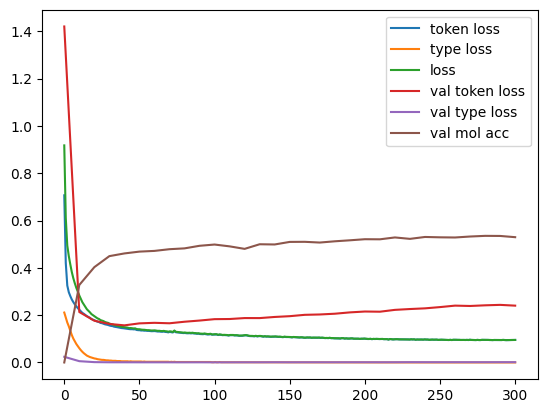

In [165]:
import numpy as np
x = np.linspace(0, 300, 300)
train_loss = []
type_loss = []
with open("decoder_loss_logs/avg_decoder_type_loss_weight_0.01_300epoch.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 4 == 2:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 4 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss) * 10
# print(train_loss[-1])
loss = train_loss + type_loss

print("min token loss", str(min(train_loss)))
print("last token loss", train_loss[-1])

v_x = np.linspace(0, 300, 31)
# print(v_x)
val_loss = []
val_type_loss = []
val_token_acc = []
val_mol_acc = []
with open("decoder_loss_logs/val_avg_decoder_type_loss_weight_0.01_300epoch.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 9 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            val_loss.append(float(train_loss_line))
        elif i % 9 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_type_loss.append(float(type_loss_line))
        elif i % 9 == 4:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_token_acc.append(float(type_loss_line))
        elif i % 9 == 7:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_mol_acc.append(float(type_loss_line))

print("max mol acc", str(max(val_mol_acc)))
print("last mol acc", val_mol_acc[-1])

# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")

plt.plot(v_x, val_loss, label="val token loss")
plt.plot(v_x, val_type_loss, label="val type loss")
# plt.plot(v_x, val_token_acc, label="val token acc")
plt.plot(v_x, val_mol_acc, label="val mol acc")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()


min token loss 0.0843
last token loss 0.0853
max mol acc 0.5127
last mol acc 0.5127


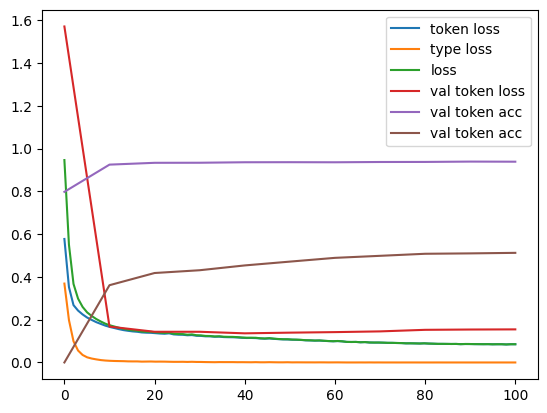

In [163]:
import numpy as np
x = np.linspace(0, 100, 100)
train_loss = []
type_loss = []
with open("decoder_loss_logs/avg_decoder_type_loss_weight_w_alpha_0.8.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 4 == 2:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 4 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print("min token loss", str(min(train_loss)))
print("last token loss", train_loss[-1])
loss = train_loss + type_loss


v_x = np.linspace(0, 100, 11)
# print(v_x)
val_loss = []
val_type_loss = []
val_token_acc = []
val_mol_acc = []
with open("decoder_loss_logs/val_avg_decoder_type_loss_weight_w_alpha_0.8.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 9 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            val_loss.append(float(train_loss_line))
        elif i % 9 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_type_loss.append(float(type_loss_line))
        elif i % 9 == 4:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_token_acc.append(float(type_loss_line))
        elif i % 9 == 7:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_mol_acc.append(float(type_loss_line))

print("max mol acc", str(max(val_mol_acc)))
print("last mol acc", val_mol_acc[-1])

# 绘制图形
plt.plot(x, train_loss, label="token loss")
plt.plot(x, type_loss, label="type loss")
plt.plot(x, loss, label="loss")

plt.plot(v_x, val_loss, label="val token loss")
# plt.plot(v_x, val_type_loss, label="val type loss")
plt.plot(v_x, val_token_acc, label="val token acc")
plt.plot(v_x, val_mol_acc, label="val token acc")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()

In [ ]:
import numpy as np
x = np.linspace(0, 300, 300)
train_loss = []
type_loss = []
with open("decoder_loss_logs/avg_decoder_type_loss_weight_0.01_300epoch.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 4 == 2:
            train_loss_line = line.split("(")[1].split(",")[0]
            train_loss.append(float(train_loss_line))
        elif i % 4 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            type_loss.append(float(type_loss_line))
# print(train_loss)
# print(type_loss)
train_loss = np.array(train_loss)
type_loss = np.array(type_loss)
print(train_loss[-1])
loss = train_loss + type_loss


v_x = np.linspace(0, 300, 31)
print(v_x)
val_loss = []
val_type_loss = []
val_token_acc = []
val_mol_acc = []
with open("decoder_loss_logs/val_avg_decoder_type_loss_weight_0.01_300epoch.txt", "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if i % 9 == 1:
            train_loss_line = line.split("(")[1].split(",")[0]
            val_loss.append(float(train_loss_line))
        elif i % 9 == 3:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_type_loss.append(float(type_loss_line))
        elif i % 9 == 4:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_token_acc.append(float(type_loss_line))
        elif i % 9 == 7:
            type_loss_line = line.split("(")[1].split(",")[0]
            val_mol_acc.append(float(type_loss_line))

print("max mol acc", str(max(val_mol_acc)))
print("last mol acc", val_mol_acc[-1])

# 绘制图形
plt.plot(x, train_loss, label="token loss")
# plt.plot(x, type_loss, label="type loss")
# plt.plot(x, loss, label="loss")

plt.plot(v_x, val_loss, label="val token loss")
# plt.plot(v_x, val_type_loss, label="val type loss")
plt.plot(v_x, val_token_acc, label="val token acc")
plt.plot(v_x, val_mol_acc, label="val token acc")
# plt.scatter(x, train_loss, s=0.5)
plt.legend()
plt.show()

# plt.plot(x_smooth, y_smooth_type)
# plt.scatter(x, type_loss)
# plt.show()